## Task 3_1_3(fill the missing data with extreme forest)

In [1]:
import pandas as pd
import numpy as np
all_data=pd.read_csv('PRSA_data.csv')

In [2]:
#Four dummy variables are introduced to deal with 'cbwd'
all_data['cvornot']=all_data['cbwd']=='cv'
for i in range(len(all_data)):
    if all_data['cvornot'][i]==True:
        all_data['cvornot'][i]=1
    else:
        all_data['cvornot'][i]=0

all_data['NEornot']=all_data['cbwd']=='NE'
for i in range(len(all_data)):
    if all_data['NEornot'][i]==True:
        all_data['NEornot'][i]=1
    else:
        all_data['NEornot'][i]=0

all_data['NWornot']=all_data['cbwd']=='NW'
for i in range(len(all_data)):
    if all_data['NWornot'][i]==True:
        all_data['NWornot'][i]=1
    else:
        all_data['NWornot'][i]=0

all_data['SEornot']=all_data['cbwd']=='SE'
for i in range(len(all_data)):
    if all_data['SEornot'][i]==True:
        all_data['SEornot'][i]=1
    else:
        all_data['SEornot'][i]=0

C:\Users\lzh\AppData\Local\Temp/ipykernel_27824/3183737851.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['cvornot'][i]=0
d:\Program Files\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\lzh\AppData\Local\Temp/ipykernel_27824/3183737851.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['NEornot'][i

In [3]:
#Fill the missing data with extreme forest regression
import copy
from sklearn.ensemble import ExtraTreesRegressor
all_data_nan=copy.deepcopy(all_data)  #存储含nan的行
all_data_isan=copy.deepcopy(all_data)  #存储不含nan的行
for i in range(len(all_data)):
    if np.isnan(all_data['pm2.5'][i])==True:
        all_data_isan.drop(index=i,inplace=True)
    else:
        all_data_nan.drop(index=i,inplace=True)

etr=ExtraTreesRegressor()
etr.fit(all_data_isan[['DEWP','TEMP','PRES','Iws','Is','Ir','cvornot','NEornot','NWornot','SEornot']],all_data_isan['pm2.5'])
all_data_nan['pm2.5']=etr.predict(all_data_nan[['DEWP','TEMP','PRES','Iws','Is','Ir','cvornot','NEornot','NWornot','SEornot']])

for i in all_data_nan.index:
    all_data['pm2.5'][i]=all_data_nan['pm2.5'][i]

C:\Users\lzh\AppData\Local\Temp/ipykernel_27824/446138311.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['pm2.5'][i]=all_data_nan['pm2.5'][i]


In [4]:
#用lof算法分别识别离群值,并除去
from sklearn.neighbors import LocalOutlierFactor
model= LocalOutlierFactor(n_neighbors=60, contamination=0.2)  #由于样本数量较多，我们保留约五分之四的数据
all_data['outlierornot']=model._fit_predict(all_data.iloc[:,[5,6,7,8,10,11,12,13,14,15,16]])
for i in all_data.index:
    if all_data['outlierornot'][i]==-1:
        all_data.drop(index=i,inplace=True)
for i in all_data.index:
    if ((all_data['pm2.5'][i]==0)|(all_data['pm2.5'][i]<0)):
        all_data.drop(index=i,inplace=True)

In [5]:
#splitting data to X and y & do log to y
from scipy import stats
all_data_X=all_data[['DEWP','TEMP','PRES','Iws','Is','Ir','cvornot','NEornot','NWornot','SEornot']]
all_data_y=all_data[['year','month','day','pm2.5']]
all_data_y['pm2.5']=np.log(all_data['pm2.5'])

C:\Users\lzh\AppData\Local\Temp/ipykernel_27824/3396474041.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_y['pm2.5']=np.log(all_data['pm2.5'])


In [6]:
#divide all data into training set and test set
import copy
from datetime import date
train_data_task3_1_3_X=copy.deepcopy(all_data_X)
test_data_task3_1_3_X=copy.deepcopy(all_data_X)
train_data_task3_1_3_y=copy.deepcopy(all_data_y)
test_data_task3_1_3_y=copy.deepcopy(all_data_y)
for i in all_data.index:
   if date(all_data['year'][i],all_data['month'][i],all_data['day'][i]).weekday()==3:
      train_data_task3_1_3_X.drop(index=i,inplace=True)
      train_data_task3_1_3_y.drop(index=i,inplace=True)
   else:
      test_data_task3_1_3_X.drop(index=i,inplace=True)
      test_data_task3_1_3_y.drop(index=i,inplace=True)

In [10]:
#Do the OLS regression
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(train_data_task3_1_3_X,train_data_task3_1_3_y['pm2.5'])
lm.score(train_data_task3_1_3_X,train_data_task3_1_3_y['pm2.5']),lm.score(test_data_task3_1_3_X,test_data_task3_1_3_y['pm2.5'])

(0.47538683253786207, 0.4784991310831693)

Text(0, 0.5, 'frequency')

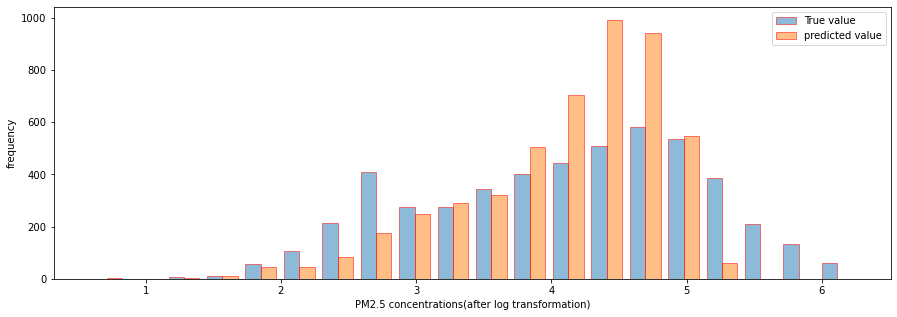

In [11]:
#用直方图可视化训练集的真实y值分布和预测y值分布
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.hist([test_data_task3_1_3_y['pm2.5'],lm.predict(test_data_task3_1_3_X)],bins=20,edgecolor="r",histtype="bar",alpha=0.5)
plt.legend(['True value','predicted value'])
plt.xlabel('PM2.5 concentrations(after log transformation)')
plt.ylabel('frequency')

In [12]:
#Ridge regression
from sklearn.linear_model import Ridge
lr=Ridge()
lr.fit(train_data_task3_1_3_X,train_data_task3_1_3_y['pm2.5'])
lr.score(train_data_task3_1_3_X,train_data_task3_1_3_y['pm2.5']),lr.score(test_data_task3_1_3_X,test_data_task3_1_3_y['pm2.5'])

(0.4753868311680933, 0.47849832937503567)

In [13]:
#Ridge with CV
from sklearn.linear_model import RidgeCV
alphas=np.logspace(-10,10,200)  
lr_cv=RidgeCV(alphas=alphas).fit(train_data_task3_1_3_X,train_data_task3_1_3_y['pm2.5'])  
lr=Ridge(lr_cv.alpha_)
lr.fit(train_data_task3_1_3_X,train_data_task3_1_3_y['pm2.5'])
lr.score(train_data_task3_1_3_X,train_data_task3_1_3_y['pm2.5']),lr.score(test_data_task3_1_3_X,test_data_task3_1_3_y['pm2.5'])

(0.4753863892217086, 0.47848430508095585)

Text(0, 0.5, 'frequency')

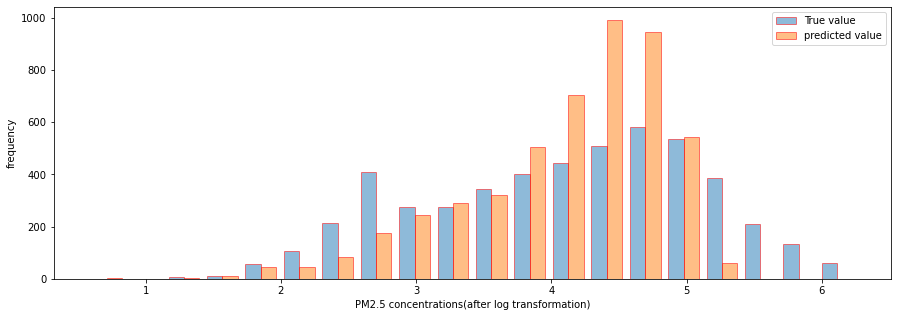

In [14]:
#用直方图可视化训练集的真实y值分布和预测y值分布
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.hist([test_data_task3_1_3_y['pm2.5'],lr.predict(test_data_task3_1_3_X)],bins=20,edgecolor="r",histtype="bar",alpha=0.5)
plt.legend(['True value','predicted value'])
plt.xlabel('PM2.5 concentrations(after log transformation)')
plt.ylabel('frequency')

In [15]:
#LASSO regression
from sklearn.linear_model import Lasso
la=Lasso()
la.fit(train_data_task3_1_3_X,train_data_task3_1_3_y['pm2.5'])
la.score(train_data_task3_1_3_X,train_data_task3_1_3_y['pm2.5']),la.score(test_data_task3_1_3_X,test_data_task3_1_3_y['pm2.5'])

(0.3220154730793193, 0.3355039724834691)

In [16]:
#LASSO with CV
from sklearn.linear_model import LassoCV
alphas=np.logspace(-10,10,200)  
la_cv=LassoCV(alphas=alphas).fit(train_data_task3_1_3_X,train_data_task3_1_3_y['pm2.5'])  
la=Lasso(la_cv.alpha_)
la.fit(train_data_task3_1_3_X,train_data_task3_1_3_y['pm2.5'])
la.score(train_data_task3_1_3_X,train_data_task3_1_3_y['pm2.5']),la.score(test_data_task3_1_3_X,test_data_task3_1_3_y['pm2.5'])

(0.4753868019688896, 0.47850090471564144)

Text(0, 0.5, 'frequency')

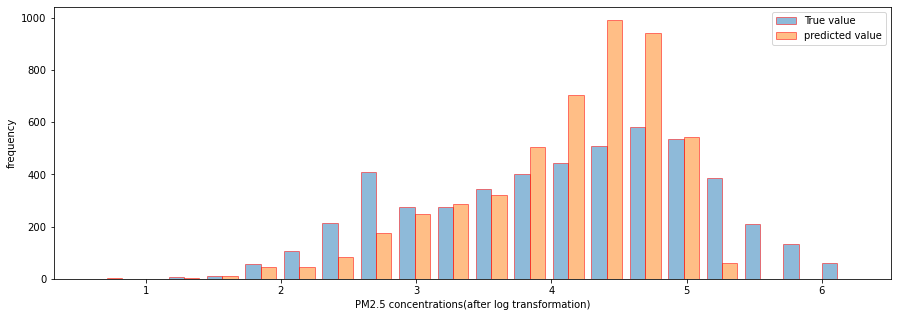

In [17]:
#用直方图可视化训练集的真实y值分布和预测y值分布
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.hist([test_data_task3_1_3_y['pm2.5'],la.predict(test_data_task3_1_3_X)],bins=20,edgecolor="r",histtype="bar",alpha=0.5)
plt.legend(['True value','predicted value'])
plt.xlabel('PM2.5 concentrations(after log transformation)')
plt.ylabel('frequency')

In [18]:
from xgboost import XGBRegressor
from sklearn import preprocessing
from hyperopt import hp, fmin, rand, tpe, space_eval
lbl = preprocessing.LabelEncoder()
train_data_task3_1_3_X['cvornot'] = lbl.fit_transform(train_data_task3_1_3_X['cvornot'].astype(str))
train_data_task3_1_3_X['NEornot'] = lbl.fit_transform(train_data_task3_1_3_X['NEornot'].astype(str))
train_data_task3_1_3_X['NWornot'] = lbl.fit_transform(train_data_task3_1_3_X['NWornot'].astype(str))
train_data_task3_1_3_X['SEornot'] = lbl.fit_transform(train_data_task3_1_3_X['SEornot'].astype(str))
test_data_task3_1_3_X['cvornot'] = lbl.fit_transform(test_data_task3_1_3_X['cvornot'].astype(str))
test_data_task3_1_3_X['NEornot'] = lbl.fit_transform(test_data_task3_1_3_X['NEornot'].astype(str))
test_data_task3_1_3_X['NWornot'] = lbl.fit_transform(test_data_task3_1_3_X['NWornot'].astype(str))
test_data_task3_1_3_X['SEornot'] = lbl.fit_transform(test_data_task3_1_3_X['SEornot'].astype(str))


space = [hp.uniform('x', 300, 700), hp.uniform('y', 2, 4),hp.uniform('z',0.1,0.2)]
def q (args) :
    x, y,z= args
    xgb=XGBRegressor(n_estimators=int(x),max_depth=int(y),learning_rate=z)
    xgb.fit(train_data_task3_1_3_X,train_data_task3_1_3_y['pm2.5'])
    return -1*xgb.score(test_data_task3_1_3_X,test_data_task3_1_3_y['pm2.5'])
best = fmin(q, space, algo=rand.suggest,max_evals=100)

xgb=XGBRegressor(n_estimators=int(best['x']),max_depth=int(best['y']),learning_rate=best['z'])
xgb.fit(train_data_task3_1_3_X,train_data_task3_1_3_y['pm2.5'])
xgb.score(train_data_task3_1_3_X,train_data_task3_1_3_y['pm2.5']),xgb.score(test_data_task3_1_3_X,test_data_task3_1_3_y['pm2.5'])

100%|██████████| 100/100 [02:02<00:00,  1.23s/trial, best loss: -0.6076772229425884]


(0.6369667410532611, 0.6076772229425884)

Text(0, 0.5, 'frequency')

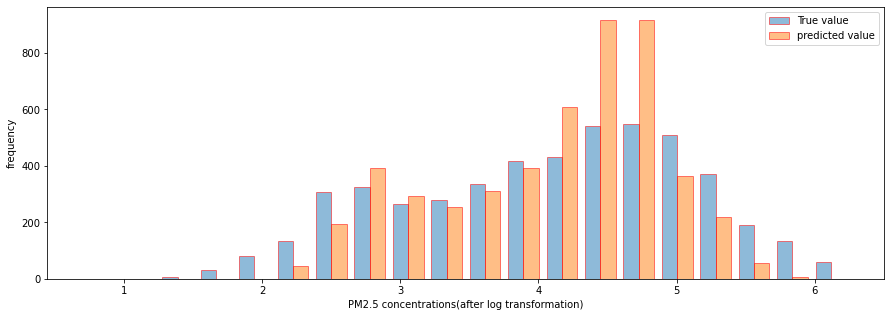

In [19]:
#用直方图可视化训练集的真实y值分布和预测y值分布
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.hist([test_data_task3_1_3_y['pm2.5'],xgb.predict(test_data_task3_1_3_X)],bins=20,edgecolor="r",histtype="bar",alpha=0.5)
plt.legend(['True value','predicted value'])
plt.xlabel('PM2.5 concentrations(after log transformation)')
plt.ylabel('frequency')

In [20]:
#梯度boosting算法(含优化函数调参)
from hyperopt import hp, fmin, rand, tpe, space_eval
from sklearn.ensemble import GradientBoostingRegressor
space = [hp.uniform('x', 300, 700), hp.uniform('y', 2, 4),hp.uniform('z',0.1,0.2)]
def q (args) :
    x, y,z= args
    gbr=GradientBoostingRegressor(n_estimators=int(x),max_depth=int(y),learning_rate=z)
    gbr.fit(train_data_task3_1_3_X,train_data_task3_1_3_y['pm2.5'])
    return -1*gbr.score(test_data_task3_1_3_X,test_data_task3_1_3_y['pm2.5'])
best = fmin(q, space, algo=rand.suggest,max_evals=100)

gbr=GradientBoostingRegressor(n_estimators=int(best['x']),max_depth=int(best['y']),learning_rate=best['z'])
gbr.fit(train_data_task3_1_3_X,train_data_task3_1_3_y['pm2.5'])
gbr.score(train_data_task3_1_3_X,train_data_task3_1_3_y['pm2.5']),gbr.score(test_data_task3_1_3_X,test_data_task3_1_3_y['pm2.5'])

100%|██████████| 100/100 [09:55<00:00,  5.95s/trial, best loss: -0.6068963485262138]


(0.6330496813566941, 0.6068923729545721)

Text(0, 0.5, 'frequency')

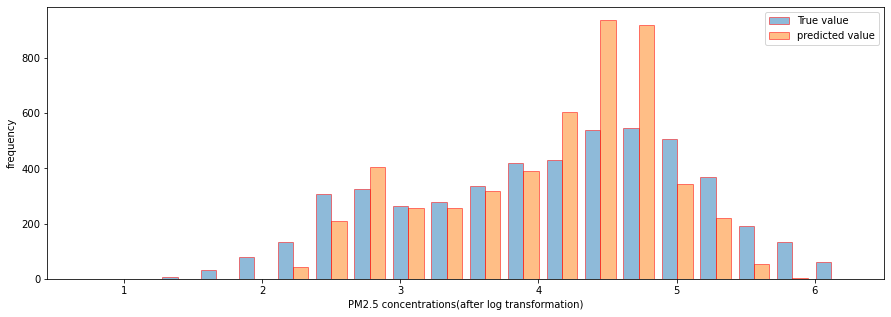

In [21]:
#用直方图可视化训练集的真实y值分布和预测y值分布
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.hist([test_data_task3_1_3_y['pm2.5'],gbr.predict(test_data_task3_1_3_X)],bins=20,edgecolor="r",histtype="bar",alpha=0.5)
plt.legend(['True value','predicted value'])
plt.xlabel('PM2.5 concentrations(after log transformation)')
plt.ylabel('frequency')

In [22]:
#catboost
from catboost import CatBoostRegressor
score=pd.DataFrame(columns=['learning_rate','score'])
for i in range(-10,11):
    ctr=CatBoostRegressor(n_estimators=1500,max_depth=6,learning_rate=0.03982+i*0.0001/20)
    ctr.fit(train_data_task3_1_3_X,train_data_task3_1_3_y['pm2.5'])
    new=pd.DataFrame({'learning_rate':0.03982+i*0.0001/20,'score':ctr.score(test_data_task3_1_3_X,test_data_task3_1_3_y['pm2.5'])},index=[1])
    score=score.append(new,ignore_index=True)

0:	learn: 0.9875831	total: 162ms	remaining: 4m 3s
1:	learn: 0.9720803	total: 166ms	remaining: 2m 4s
2:	learn: 0.9565741	total: 170ms	remaining: 1m 24s
3:	learn: 0.9423475	total: 174ms	remaining: 1m 5s
4:	learn: 0.9287483	total: 178ms	remaining: 53.3s
5:	learn: 0.9165548	total: 182ms	remaining: 45.4s
6:	learn: 0.9045842	total: 186ms	remaining: 39.7s
7:	learn: 0.8935851	total: 191ms	remaining: 35.6s
8:	learn: 0.8827888	total: 194ms	remaining: 32.2s
9:	learn: 0.8733855	total: 198ms	remaining: 29.5s
10:	learn: 0.8638696	total: 202ms	remaining: 27.3s
11:	learn: 0.8542163	total: 206ms	remaining: 25.6s
12:	learn: 0.8450700	total: 210ms	remaining: 24s
13:	learn: 0.8367887	total: 213ms	remaining: 22.7s
14:	learn: 0.8291983	total: 217ms	remaining: 21.5s
15:	learn: 0.8219538	total: 221ms	remaining: 20.5s
16:	learn: 0.8161471	total: 225ms	remaining: 19.6s
17:	learn: 0.8101202	total: 229ms	remaining: 18.8s
18:	learn: 0.8041216	total: 233ms	remaining: 18.1s
19:	learn: 0.7979208	total: 237ms	remainin

In [23]:
score

,learning_rate,score
0,0.039770,0.612860
1,0.039775,0.612701
2,0.039780,0.613391
3,0.039785,0.612723
4,0.039790,0.613494
5,0.039795,0.612346
6,0.039800,0.613811
7,0.039805,0.613011
8,0.039810,0.612978
9,0.039815,0.613068


In [26]:
ctr=CatBoostRegressor(n_estimators=1500,max_depth=6,learning_rate=0.039860)
ctr.fit(train_data_task3_1_3_X,train_data_task3_1_3_y['pm2.5'])
ctr.score(train_data_task3_1_3_X,train_data_task3_1_3_y['pm2.5']),ctr.score(test_data_task3_1_3_X,test_data_task3_1_3_y['pm2.5'])

0:	learn: 0.9875453	total: 4.62ms	remaining: 6.92s
1:	learn: 0.9720099	total: 8.9ms	remaining: 6.67s
2:	learn: 0.9564730	total: 12.6ms	remaining: 6.29s
3:	learn: 0.9422200	total: 16.5ms	remaining: 6.15s
4:	learn: 0.9285976	total: 20.7ms	remaining: 6.2s
5:	learn: 0.9160989	total: 24.5ms	remaining: 6.1s
6:	learn: 0.9041656	total: 28.1ms	remaining: 6s
7:	learn: 0.8931711	total: 31.9ms	remaining: 5.95s
8:	learn: 0.8824757	total: 36.1ms	remaining: 5.98s
9:	learn: 0.8730695	total: 39.8ms	remaining: 5.93s
10:	learn: 0.8636798	total: 43.7ms	remaining: 5.92s
11:	learn: 0.8540541	total: 47.3ms	remaining: 5.87s
12:	learn: 0.8448747	total: 51.5ms	remaining: 5.89s
13:	learn: 0.8366457	total: 55.2ms	remaining: 5.86s
14:	learn: 0.8291194	total: 59.1ms	remaining: 5.86s
15:	learn: 0.8219442	total: 62.9ms	remaining: 5.83s
16:	learn: 0.8161748	total: 67.6ms	remaining: 5.9s
17:	learn: 0.8101642	total: 71.2ms	remaining: 5.86s
18:	learn: 0.8042099	total: 74.6ms	remaining: 5.81s
19:	learn: 0.7983355	total: 7

(0.6574018959335886, 0.6138275445114958)

Text(0, 0.5, 'frequency')

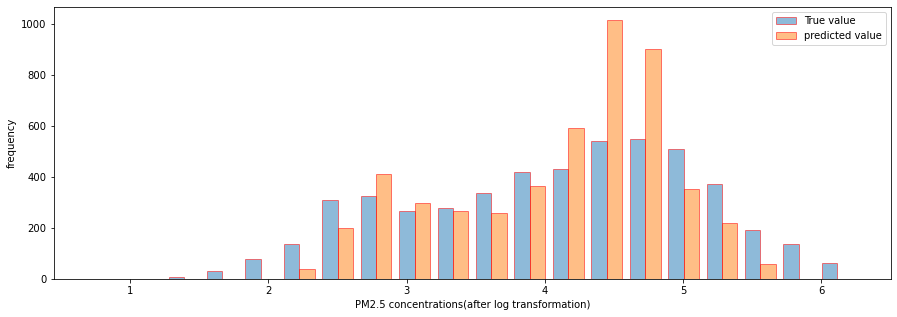

In [27]:
#用直方图可视化训练集的真实y值分布和预测y值分布
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.hist([test_data_task3_1_3_y['pm2.5'],ctr.predict(test_data_task3_1_3_X)],bins=20,edgecolor="r",histtype="bar",alpha=0.5)
plt.legend(['True value','predicted value'])
plt.xlabel('PM2.5 concentrations(after log transformation)')
plt.ylabel('frequency')